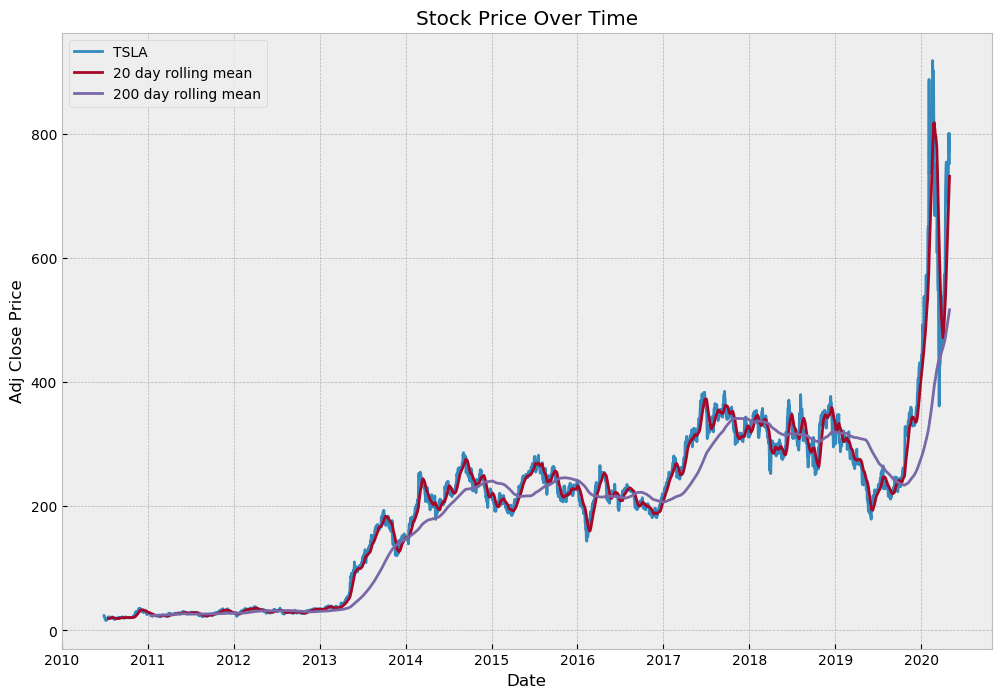

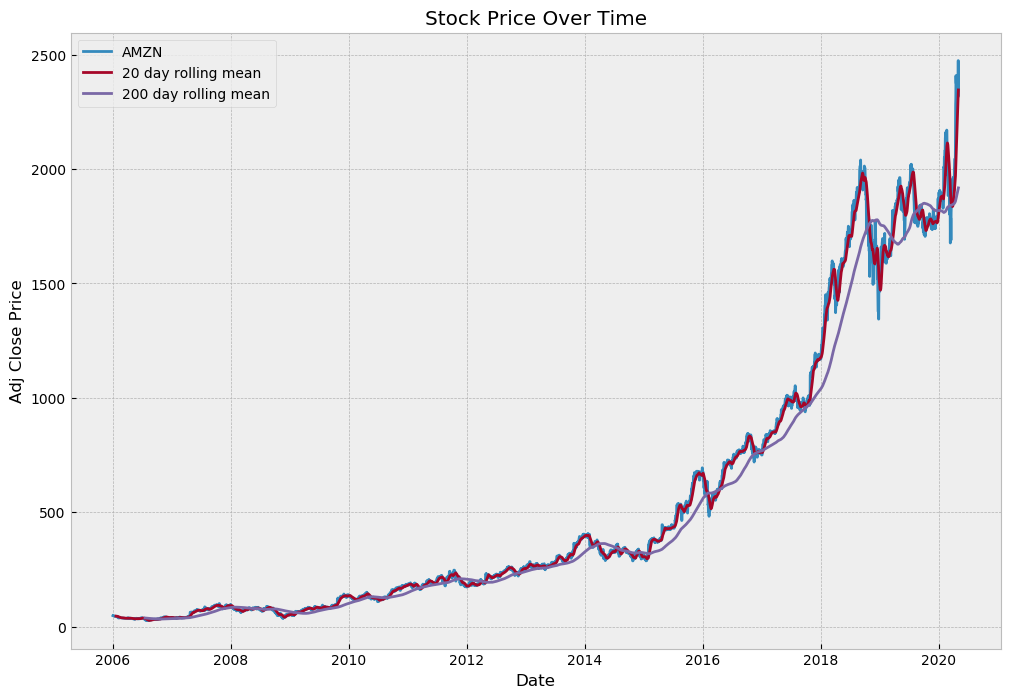

In [33]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

start_date = '2006-01-01'
end_date = str(datetime.now().strftime('%Y-%m-%d'))

uk_stock = 'TSLA'
us_stock = 'AMZN'

def get_stats(stock_data):
    return {
        'last': np.mean(stock_data.tail(1)),
        'short_mean': np.mean(stock_data.tail(20)),
        'long_tail': np.mean(stock_data.tail(200)),
        'short_rolling': stock_data.rolling(window=20).mean(),
        'long_rolling': stock_data.rolling(window=200).mean(),
    }

def clean_data(stock_data, col):
    weekdays = pd.date_range(start=start_date, end=end_date)
    clean_data_1 = stock_data[col].reindex(weekdays)
    return clean_data_1.fillna(method='ffill')

def create_plt(stock_data, ticker):
    stats = get_stats(stock_data)
    plt.style.use('bmh')
    plt.subplots(figsize=(12,8))
    plt.plot(stock_data, label=ticker)
    plt.plot(stats['short_rolling'], label='20 day rolling mean')
    plt.plot(stats['long_rolling'], label='200 day rolling mean')
    plt.xlabel('Date')
    plt.ylabel('Adj Close Price')
    plt.legend()
    plt.title('Stock Price Over Time')
    plt.show()

def get_data(ticker):
    try:
        stock_data = data.DataReader(ticker,
                                     'yahoo',
                                     start_date,
                                     end_date)
        
        adj_close = clean_data(stock_data, 'Adj Close')
        create_plt(adj_close, ticker)

    except RemoteDataError:
        print('No data found for {t}'.format(t=ticker))


get_data(uk_stock)
get_data(us_stock)
